<h1>Chapter 4 with keras

https://github.com/rragundez/PyDataAmsterdam2018/blob/master/05_transfer_learning_for_image_classification.ipynb

In [5]:
%%HTML
<link rel="stylesheet" type="text/css" href="//fonts.googleapis.com/css?family=Quicksand:300" />
<link rel="stylesheet" type="text/css" href="custom.css">
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
img {
  border-radius: 8px;
}

</style>

<font size='6'><b>Transfer learning for image classification

In [3]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [1]:
import os
import random

from pprint import pprint

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

from farhad_DL.utils import plot_training_summary
from farhad_DL.utils import TimeSummary
from farhad_DL.utils import save_keras_dataset_to_disk

%matplotlib inline

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = 15, 6

# Pre-trained models available in Keras

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. these pre-wieght is used already by university , Google or somebody else <br> 
Pre-trained model is a quite complicated network<br>
<button type="button" class="btn btn-default  btn-lg" ><font color="withe">https://keras.io/applications/</font></button>

![pre-trained models](https://github.com/rragundez/PyDataAmsterdam2018/raw/94ba390d7bf5f13c5e8242fb67e9e350785e24e2/images/pre_trained_models.png)

## Inception V3:

Trained for imagenet over 1000 classes. Check the classes it was trained on <br>
<button type="button" class="btn btn-default  btn-lg" >https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a</button>

<img src="https://github.com/rragundez/PyDataAmsterdam2018/raw/94ba390d7bf5f13c5e8242fb67e9e350785e24e2/images/inceptionV3.png"></img>

## MobileNet (Summary)

<img src="https://github.com/rragundez/PyDataAmsterdam2018/raw/94ba390d7bf5f13c5e8242fb67e9e350785e24e2/images/mobilenet.jpeg"></img>

# Predict image using MobileNet

In [7]:
from tensorflow.keras.applications.mobilenet import decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
model = MobileNet(weights='imagenet') # this can take a bit
#model.summary()

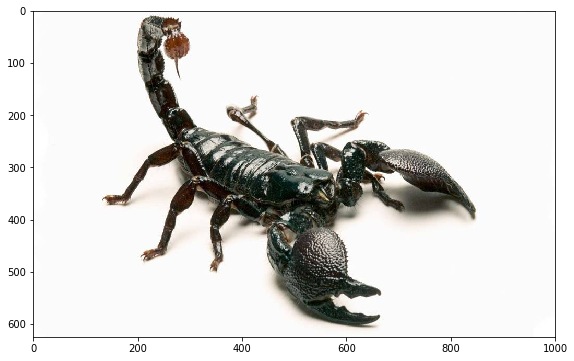

In [9]:
img_path = 'image.jpg'
plt.imshow(mpimg.imread(img_path));

In [10]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) # turn to  decimal
preds = decode_predictions(model.predict(x), top=5)[0]
preds = [(x[1], x[2]) for x in preds]
pprint(preds)

40960/35363 [==================================] - 0s 3us/step
[('scorpion', 0.99946696),
 ('weevil', 0.0001736456),
 ('rock_crab', 0.00014089514),
 ('long-horned_beetle', 0.0001238445),
 ('American_lobster', 3.0616935e-05)]


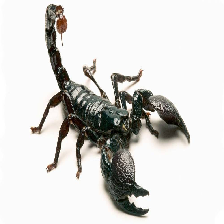

In [11]:
image.load_img(img_path, target_size=(224, 224))

In [18]:
image.img_to_array(img)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.],
        ...,
        [252., 252., 252.],
        [254., 254., 254.],
        [254., 254., 254.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [253., 253., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [253., 253., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

In [20]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [254., 254., 254.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [254., 254., 254.],
         ...,
         [253., 253., 253.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [254., 254., 254.],
         ...,
         [252., 252., 252.],
         [254., 254., 254.],
         [254., 254., 254.]],

        ...,

        [[254., 254., 254.],
         [254., 254., 254.],
         [253., 253., 253.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [253., 253., 253.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[254., 254., 254.],
       

In [17]:
#preprocess_input(x)

# Now do that for a dataset

# Data

In [10]:
from tensorflow.keras.applications.mobilenet import decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import random

In [25]:
from farhad_DL.utils import save_keras_dataset_to_disk
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [33]:
from tensorflow.keras.preprocessing import image
from farhad_DL.utils import TimeSummary,plot_training_summary

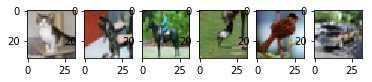

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
[ax.imshow(random.choice(X_train), cmap='gray') for ax in plt.subplots(1, 6)[1]];

In [14]:
# takes around 1.5 minutes and occupies ~50MB
save_keras_dataset_to_disk(X_train, y_train, X_test, y_test)

In [ ]:
# this only works if you have the tree command
! tree -L 2 data/CIFAR10

In [49]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [ ]:
#base_model.summary()

In [16]:
# make thoes layers not trainable, you should freeze them.
for layer in base_model.layers:
    layer.trainable = False


<b>Exercise 1: add custom layers for our CIFAR10 dataset problem (solution in utils.py)</b><br>
using the functional API you will:<br>
- get the output from the base model
- add GlobalAveragePooling2D layer
- add Dense layer of 512 units
- add output Dense layer with 10 units
- put layers together into custom model

In [60]:
def make_inceptionV3_custom_model(base_model):
    # get base model output
    x = base_model.output
    # add GlobalAveragePooling2D layer
    x = layers.GlobalAveragePooling2D(name='CustomLayer_1')(x)
    # add Dense layer of 512 units
    x = layers.Dense(name='CustomLayer_2', units=512, activation='relu')(x)
    # add output Dense layer with 10 units and softmax activation function
    predictions = layers.Dense(name='OutputLayer',
                               units=10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model 

In [61]:
model = make_inceptionV3_custom_model(base_model)
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
for l in model.layers:
    if l.trainable:
        print(l)

# Exercise 2: Ingest CIFAR10 data from file

Implement ImageDataGenerator such that:
- pixel values are re-scaled in the interval 0 to 1
- when changing the image size to (128X128) the missing pixels are filled with 0

In [62]:
train_datagen = image.ImageDataGenerator(rescale=1/255)

Implement ImageDataGenerator.flow_from_directory such that:
- we read the images from data/CIFAR10/train
- the target size is set to 128x128
- the class vairable is set to categorical values (10 classes)
- ensure shuffle
- and the betch size is set by us


In [63]:
batch_size = 50

train_generator = train_datagen.flow_from_directory("data/CIFAR10/train",batch_size=batch_size,target_size=(128,128),class_mode="categorical")

Found 50000 images belonging to 10 classes.


Use  Sequential.fit_generator such that:
- we ingest images using the train_generator
- train for 5 epochs
- use 10 steps_per_epoch
- use a suitable max_queue_size (check your memory consumption)

In [69]:
time_summary = TimeSummary()
summary = model.fit_generator(train_generator ,
    # fill here
    epochs=40,steps_per_epoch=2,
    verbose=1,
    callbacks=[time_summary]
)

Epoch 1/40
2/2 [==============================] - 17s 8s/step - loss: 1.5678 - acc: 0.5200
Epoch 2/40
2/2 [==============================] - 15s 8s/step - loss: 1.9327 - acc: 0.3500
Epoch 3/40
2/2 [==============================] - 17s 9s/step - loss: 1.5137 - acc: 0.4900
Epoch 4/40
2/2 [==============================] - 14s 7s/step - loss: 1.5623 - acc: 0.4400
Epoch 5/40
2/2 [==============================] - 16s 8s/step - loss: 1.1408 - acc: 0.5900
Epoch 6/40
2/2 [==============================] - 16s 8s/step - loss: 1.1280 - acc: 0.6400
Epoch 7/40
2/2 [==============================] - 16s 8s/step - loss: 1.3230 - acc: 0.5000
Epoch 8/40
2/2 [==============================] - 14s 7s/step - loss: 1.0369 - acc: 0.6400
Epoch 9/40
2/2 [==============================] - 14s 7s/step - loss: 1.2062 - acc: 0.5800
Epoch 10/40
2/2 [==============================] - 15s 8s/step - loss: 1.1194 - acc: 0.6000
Epoch 11/40
2/2 [==============================] - 17s 9s/step - loss: 1.2819 - acc: 0.58

Training time: 0:25:08.800304(HH:MM:SS)
Epoch time avg: 0:00:37.718060(HH:MM:SS)


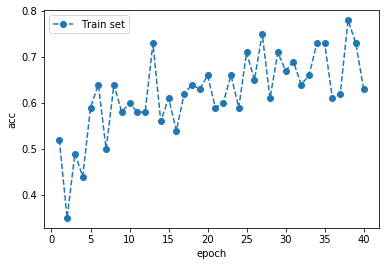

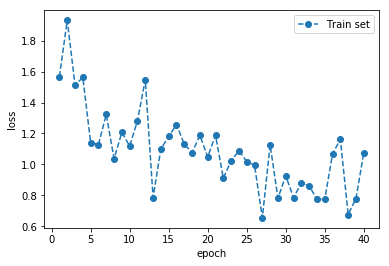

In [70]:
plot_training_summary(summary, time_summary)

In [57]:
import matplotlib.image as mpimg
import numpy as np

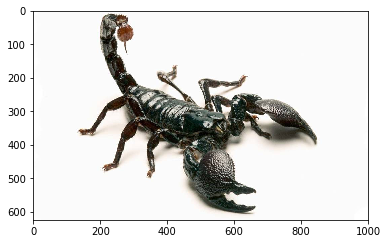

In [55]:
img_path = 'image.jpg'
plt.imshow(mpimg.imread(img_path));

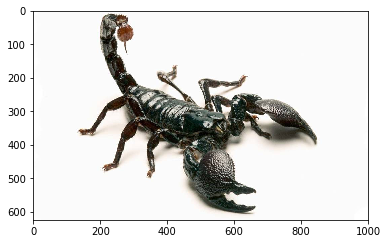

In [58]:
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img_path = 'image.jpg'
plt.imshow(mpimg.imread(img_path));


In [71]:
model.predict(x)

array([[4.1475624e-01, 1.8756426e-04, 4.2267093e-01, 8.8944241e-02,
        1.7514808e-02, 7.9130975e-04, 2.3129432e-02, 4.3371348e-03,
        2.1106958e-02, 6.5613338e-03]], dtype=float32)